<a href="https://colab.research.google.com/github/Stephen-Njuguna/Moringa_school-_IP-_Week-9/blob/main/Morninga_School_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email spam detection using Naive Bayes**

## Defining the Question 
Creating a model that can detect if an email is a spam or not spam

## Defining Metrics of success
Being able to create a model that has an accuracy of more than 70% and can accurately detect if email is a spam or not a spam  

## Understanding the Content 
Email spam, also referred to as junk email or simply spam, is unsolicited messages sent in bulk by email. The name comes from a Monty Python sketch in which the name of the canned pork product Spam is ubiquitous, unavoidable, and repetitive.

## Recording the Experimental Design
1.   Importing the libraries
2.   Loading and viewing the dataset
3.   Cleaning the data.
4.   Univariate analysis
5.   Bivariate analysis
6.   Naive Bayes algorithm
7. Conclusion and Recommendation

## Reading Dataset

In [92]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [60]:
#Loading Dataset 
df = pd.read_csv('spambase.data',header = None ,encoding='latin')

## Checking Data

In [61]:
# Determining the no. of records in our dataset
#
df.shape

(4601, 58)

In [62]:
# Previewing the Dataset
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [63]:
#checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

### Define the appropriateness of the available data
The dataset provided is appropriate to answer the question because it has all the variables required to categorize if an email is a spam or not a spam 

## Data Cleaning 

In [64]:
#Checking for missing values 
df.isnull().sum().sum()

0

## Exploratory Data Analysis

In [65]:
#data Description 
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3

In [66]:
#Check multicolinearity 
#check for multicollinearity 
X = df.drop(57,axis=1)
independent_only = X.corr()
#computing the VIF
pd.DataFrame(np.linalg.inv(independent_only.values), index = independent_only.index, columns=independent_only.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,1.135153,0.012350,-0.003005,-0.011262,0.019017,-0.010584,0.056967,0.067177,-0.049812,0.011000,-0.147383,-0.080526,-0.019708,-0.004347,0.050059,-0.020360,-0.032932,-0.014943,-0.024204,0.039415,-0.113488,0.020591,-0.104968,-0.159214,0.016099,0.002550,0.024919,-0.000843,0.026043,0.014323,-0.001674,0.497421,0.015831,-0.580696,0.004708,0.023563,0.030963,0.000069,-0.017190,0.052675,-0.019840,-0.004041,-0.013928,0.004175,0.009231,0.011212,-0.000122,0.004829,0.006815,-0.012300,0.019723,-0.018004,-0.034538,0.004134,-0.035584,0.017688,-0.031946
1,0.012350,1.034308,0.035450,0.014838,0.027797,0.027689,0.007607,0.024007,0.009444,-0.043468,-0.002407,0.040869,0.026032,0.006125,0.002169,0.018901,0.009151,-0.047766,0.091338,0.017722,0.019839,0.025579,0.017815,-0.010903,0.054712,0.026177,0.076168,0.012972,0.006283,0.019139,0.006651,-0.260265,0.036246,0.127292,0.013906,0.050449,0.018780,0.005460,0.006231,0.025134,0.008746,0.027087,-0.006193,0.031777,0.018018,0.040783,0.012268,0.022013,0.003940,0.085882,0.022466,0.013535,-0.002269,-0.005881,0.020770,-0.062032,0.042594
2,-0.003005,0.035450,1.110868,0.025553,-0.025045,-0.029081,0.018319,0.026838,-0.030984,0.020052,0.029335,-0.055152,-0.006404,0.009230,-0.066318,-0.033517,0.024790,-0.068281,-0.073042,-0.000892,-0.093658,0.037268,-0.057363,0.018393,0.049853,0.001784,0.076732,0.008023,0.052268,-0.057110,-0.032204,-0.095813,0.037710,0.121415,0.017017,-0.023692,0.023023,-0.033580,-0.014925,0.040945,0.000292,-0.028603,0.013328,0.046181,0.042644,0.041779,-0.031549,0.016652,0.010199,-0.010206,0.014296,-0.072305,-0.006081,0.007517,-0.089127,-0.012638,-0.012719
3,-0.011262,0.014838,0.025553,1.007701,-0.000716,0.018018,-0.017022,-0.009305,0.012870,0.005555,0.022808,0.019571,0.021511,-0.010165,0.005498,0.001048,0.000294,-0.019564,0.023535,0.011474,-0.005378,-0.029183,-0.009220,-0.034434,0.011956,0.005976,0.018704,0.002409,-0.002053,0.001831,0.002571,-0.033283,0.009278,0.013410,0.000067,0.001455,0.000180,0.001763,-0.004319,0.008475,0.001438,0.006994,0.004688,0.007117,0.010968,0.009974,0.003676,0.002012,0.014291,0.028890,0.006529,0.005109,-0.004871,0.008424,0.013313,-0.038843,-0.006344
4,0.019017,0.027797,-0.025045,-0.000716,1.120328,-0.019608,-0.104157,0.016928,0.036461,-0.008505,0.006160,-0.030493,-0.009181,-0.000783,-0.032217,-0.051898,-0.112734,-0.026989,-0.045829,0.010691,-0.074217,0.017576,-0.024232,0.042079,0.017067,0.039075,0.069237,0.016347,-0.014479,0.015306,0.023613,-0.152296,0.016175,0.052744,0.016418,0.013761,0.019610,-0.130431,0.017076,0.026061,0.006765,-0.120144,0.018476,-0.030431,0.027496,0.059977,0.029395,0.023478,0.009986,0.030219,0.005502,0.017516,0.007048,0.002538,-0.039619,-0.033918,0.028846
5,-0.010584,0.027689,-0.029081,0.018018,-0.019608,1.099838,-0.021059,-0.044818,-0.054087,0.045362,0.015087,0.011433,-0.032913,0.010359,-0.093922,0.020304,-0.000187,-0.014927,-0.029474,-0.028741,-0.026019,-0.005784,-0.146258,-0.017472,0.026618,0.035386,0.042820,0.021292,0.003759,-0.016409,0.009055,-0.111890,0.014203,0.040811,0.016191,0.003932,0.011012,0.011750,0.022439,0.051169,0.010651,0.031678,-0.001009,0.014281,0.040241,0.013958,0.011670,0.017457,0.012810,-0.002789,0.001573,-0.030302,-0.006646,-0.014197,0.058553,-0.057151,0.004469
6,0.056967,0.007607,0.018319,-0.017022,-0.104157,-0.021059,1.124583,0.028193,0.003753,-0.018912,-0.121315,0.036937,0.027750,0.027626,0.012687,-0.085832,-0.152859,-0.095326,-0.042362,0.017482,-0.008689,0.000918,-0.005308,0.008139,0.041989,0.007120,0.051468,0.021067,0.000609,0.030097,0.013463,-0.146212,0.018274,0.092951,0.006651,0.015485,-0.004918,0.022471,0.011809,-0.014679,-0.003498,0.037818,0.016822,0.026404,0.035503,0.042855,0.010958,0.017766,0.022408,0.043399,0.008721,-0.005829,-0.035611,-0.046618,-0.007216,-0.069518,0.078807
7,0.067177,0.024007,0.026838,-0.009305,0.016928,-0.044818,0.028193,1.098624,-0.039047,-

There is no correlation between the variables , they have a VIF score of 1

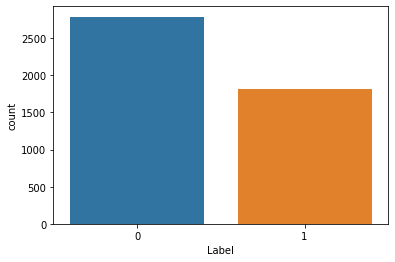

In [67]:
#Plotting a bar graph to check target column distribution 
sns.countplot(df[57])
plt.xlabel("Label")
plt.show()

### Multivariate Analysis

In [68]:
#Identify Highly Correlated Features
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(df[to_drop], axis=1,inplace=True)

In [69]:
#Dimension reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
#Fit feature variables 
X = df.drop(57,axis=1)
X = pca.fit_transform(X)

### Naive Bayes Model 

In [70]:
#split feature and target variable 
X= df.drop(57,axis=1)
y = df[57]

In [71]:
#Model optimazation
#Normalization the feature observation 
from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
X = normalizer.transform(X)

In [72]:
#split to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

#Import Gaussian Navie Bayes model
nb = GaussianNB()
#Train model 
nb.fit(X_train,y_train)

#predict model using test 
y_pred = nb.predict(X_test)

In [73]:
#Evaluate model performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[347 184]
 [ 20 370]]
              precision    recall  f1-score   support

           0       0.95      0.65      0.77       531
           1       0.67      0.95      0.78       390

    accuracy                           0.78       921
   macro avg       0.81      0.80      0.78       921
weighted avg       0.83      0.78      0.78       921



 Using Gaussian Naive Bayes algorithm, the model accuracy is 78%
*  Confusion matrix ;

1.  We have  true negative values of 347
2.  We have a false negative of 184
3. We have a false postive of 20
4. We have a True positive of 370

In [75]:
#Import Multinomial Naive Bayes
mgb = MultinomialNB()

#Fit model 
mgb.fit(X_train,y_train)
#Predict with model 
Y_pred = mgb.predict(X_test)

In [77]:
#Evaluate model performance
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[531   0]
 [390   0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       531
           1       0.00      0.00      0.00       390

    accuracy                           0.58       921
   macro avg       0.29      0.50      0.37       921
weighted avg       0.33      0.58      0.42       921



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using Multinomial Naive Bayes the model accuracy reduced to 58%
*  Confusion matrix ;

1.  We have  true negative values of 531
2.  We have a false negative of 0
3. We have a false postive of 390
4. We have a True positive of 0

In [82]:
#Algorithm model using Bernoulli Naive Baye Classification 
from sklearn.naive_bayes import BernoulliNB
b_nb = BernoulliNB()
#Fit and train model 
b_nb.fit(X_train,y_train)
#Predict 
y_pred = b_nb.predict(X_test)

In [83]:
#Evaluate model performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[498  33]
 [ 83 307]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       531
           1       0.90      0.79      0.84       390

    accuracy                           0.87       921
   macro avg       0.88      0.86      0.87       921
weighted avg       0.88      0.87      0.87       921



using Bernoulli Naive Bayes, the model accuracy increased to 87%
*  Confusion matrix ;

1.  We have  true negative values of 498
2.  We have a false negative of 33
3. We have a false postive of 83
4. We have a True positive of 307

### Spliting train and Test to 70-30 ratio


In [84]:
#split to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [85]:
#Import Gaussian Navie Bayes model
nb = GaussianNB()
#Train model 
nb.fit(X_train,y_train)

#predict model using test 
y_pred = nb.predict(X_test)

#Evaluate model performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[533 271]
 [ 32 545]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.78       804
           1       0.67      0.94      0.78       577

    accuracy                           0.78      1381
   macro avg       0.81      0.80      0.78      1381
weighted avg       0.83      0.78      0.78      1381



After change the test- train distribution to 30-70  the model accuracy is  78%
*  Confusion matrix ;

1.  We have  true negative values of 533
2.  We have a false negative of 271
3. We have a false postive of 32
4. We have a True positive of 545

In [86]:
#Import Multinomial Naive Bayes
mgb = MultinomialNB()

#Fit model 
mgb.fit(X_train,y_train)
#Predict with model 
Y_pred = mgb.predict(X_test)

#Evaluate model performance
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[804   0]
 [576   1]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       804
           1       1.00      0.00      0.00       577

    accuracy                           0.58      1381
   macro avg       0.79      0.50      0.37      1381
weighted avg       0.76      0.58      0.43      1381



After change the test- train distribution to 30-70  the model accuracy is  58%
*  Confusion matrix ;

1.  We have  true negative values of 804
2.  We have a false negative of 0
3. We have a false postive of 576
4. We have a True positive of 1

In [87]:
#Import Bernoulli Naive Baye Classification 
from sklearn.naive_bayes import BernoulliNB
b_nb = BernoulliNB()
#Fit and train model 
b_nb.fit(X_train,y_train)
#Predict 
y_pred = b_nb.predict(X_test)

#Evaluate model performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[745  59]
 [110 467]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       804
           1       0.89      0.81      0.85       577

    accuracy                           0.88      1381
   macro avg       0.88      0.87      0.87      1381
weighted avg       0.88      0.88      0.88      1381



After change the test- train distribution to 30-70  the model accuracy is  88%
*  Confusion matrix ;

1.  We have  true negative values of 745
2.  We have a false negative of 59
3. We have a false postive of 110
4. We have a True positive of 467

### Spliting train and Test to 60-40 ratio

In [88]:
#split to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4,random_state=42)

In [89]:
#Import Gaussian Navie Bayes model
nb = GaussianNB()
#Train model 
nb.fit(X_train,y_train)

#predict model using test 
y_pred = nb.predict(X_test)

#Evaluate model performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[713 376]
 [ 41 711]]
              precision    recall  f1-score   support

           0       0.95      0.65      0.77      1089
           1       0.65      0.95      0.77       752

    accuracy                           0.77      1841
   macro avg       0.80      0.80      0.77      1841
weighted avg       0.83      0.77      0.77      1841



After change the test- train distribution to 40-60  the model accuracy is  77%
*  Confusion matrix ;

1.  We have  true negative values of 713
2.  We have a false negative of 376
3. We have a false postive of 41
4. We have a True positive of 711

In [90]:
#Import Multinomial Naive Bayes
mgb = MultinomialNB()

#Fit model 
mgb.fit(X_train,y_train)
#Predict with model 
Y_pred = mgb.predict(X_test)

#Evaluate model performance
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[1089    0]
 [ 751    1]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1089
           1       1.00      0.00      0.00       752

    accuracy                           0.59      1841
   macro avg       0.80      0.50      0.37      1841
weighted avg       0.76      0.59      0.44      1841



After change the test- train distribution to 40-60  the model accuracy is  59%
*  Confusion matrix ;

1.  We have  true negative values of 1089
2.  We have a false negative of 0
3. We have a false postive of 751
4. We have a True positive of 1

In [91]:
#Import Bernoulli Naive Baye Classification 
from sklearn.naive_bayes import BernoulliNB
b_nb = BernoulliNB()
#Fit and train model 
b_nb.fit(X_train,y_train)
#Predict 
y_pred = b_nb.predict(X_test)

#Evaluate model performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1014   75]
 [ 144  608]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1089
           1       0.89      0.81      0.85       752

    accuracy                           0.88      1841
   macro avg       0.88      0.87      0.87      1841
weighted avg       0.88      0.88      0.88      1841



After change the test- train distribution to 40-60  the model accuracy is  88%
*  Confusion matrix ;

1.  We have  true negative values of 1014
2.  We have a false negative of 75
3. We have a false postive of 144
4. We have a True positive of 608

## Recommendation

I would recommend to use the Bernoulli Naive Bayes because it as a high accuracy compared to the other Naive Bayes models